<a href="https://colab.research.google.com/github/Sachinrn28/D-analysis-assignments/blob/main/Nearest_neighbour_means1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [54]:
url=url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'
response=requests.get(url)
df=pd.read_csv(StringIO(response.text))

In [55]:
df.sample(5)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
199,202,1601.100,3,7,3,2,2,33500
401,405,2255.772,2,25,3,2,2,80000
265,268,1135.002,2,7,3,2,1,37000
304,308,1871.508,11,12,4,2,2,49999
419,423,469.656,7,7,1,1,1,34000


In [5]:
print("The shape of the data is:",df.shape)

The shape of the data is: (645, 8)


In [6]:
print('\033[94mTo know the column names that present in the data are:')
df.columns

To know the column names that present in the data are:


Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [ ]:
print('\033[94mTo know the information about the data:')
df.describe()

# We have Outliers will explore that in boxplot next

To know the information about the data:


,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [ ]:
print('\033[94mThe information on the data is \033[0m')
df.info()

The information on the data is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [56]:
# we have all the data which are 4 decimal points so we can reduce the value to the
df['Sqft']=df['Sqft'].round(2)

In [ ]:
df['Unnamed: 0'].nunique() # all these unique values are just same as sl number we can change them as serial name

645

In [57]:
df=df.rename(columns={'Unnamed: 0':'Record Nu'})# Set the index value

In [12]:
df.set_index('Record Nu',inplace=True)

In [15]:
df.sample(5)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Record Nu,,,,,,,
203,1174.14,14,14,3,2,1,26000
558,889.50,11,18,2,2,1,30500
357,1992.48,5,7,4,2,3,55000
38,768.53,4,4,3,2,2,60000
117,1569.08,6,7,3,2,2,55000


In [14]:
df.skew()# To check the skewness of the data

Sqft           1.427425
Floor          1.378214
TotalFloor     0.964188
Bedroom       -0.049651
Living.Room   -1.181956
Bathroom       0.990518
Price          1.837773
dtype: float64

In [21]:
# Handeling the null value
df[df.isnull()].value_counts()  # There are no null values

Series([], dtype: int64)

In [22]:
# Handeling the outliers

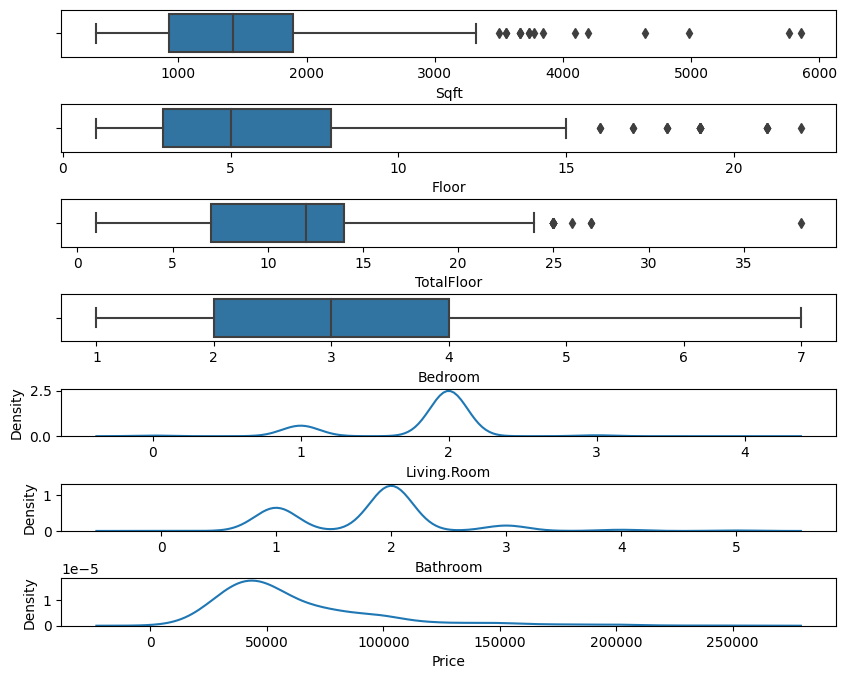

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axs=plt.subplots(7,figsize=(10,8))
plt.subplots_adjust(hspace=1)
sns.boxplot(x=df['Sqft'],labels=['Sqft'],ax=axs[0])
sns.boxplot(x=df['Floor'],labels=['Floor'],ax=axs[1])
sns.boxplot(x=df['TotalFloor'],labels=['TotalFloor'],ax=axs[2])
sns.boxplot(x=df['Bedroom'],labels=['Bedroom'],ax=axs[3])
sns.kdeplot(x=df['Living.Room'],ax=axs[4])
sns.kdeplot(x=df['Bathroom'],ax=axs[5])
sns.kdeplot(x=df['Price'],ax=axs[6])
plt.show()

In [43]:
# Training and testing the data
df.shape

(645, 7)

In [123]:
#scaling the data to some desired Standard_Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.fit_transform(x_test)

In [61]:
df['Record Nu'].values  # we can drop this record column also

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [63]:
# Devide the data in to x and y first means like dependent and independent variabledf.columns
x=df.drop(['Price','Record Nu'],axis=1)
y=df['Price']

In [68]:
x

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.70,2,7,2,2,2
1,2134.80,5,7,4,2,2
2,1138.56,5,7,2,2,1
3,1458.78,2,7,3,2,2
4,967.78,11,14,3,2,2
...,...,...,...,...,...,...
640,1359.16,7,15,3,2,2
641,377.15,4,10,1,1,1
642,740.06,13,14,1,1,1
643,1707.84,3,14,3,2,2


In [65]:
y

0      62000
1      78000
2      58000
3      45000
4      45000
       ...  
640    45000
641    24800
642    45000
643    65000
644    36000
Name: Price, Length: 645, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
x_train,x_test,y_train,y_test

(        Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom
 515  1487.24      6           7        3            1         2
 29    853.92      6           7        2            1         1
 274  1138.56      4           5        3            2         2
 576   693.81      2           7        1            1         1
 434  2910.44      4           7        3            2         3
 ..       ...    ...         ...      ...          ...       ...
 71   1284.44      6          12        3            2         2
 106  3202.20     12          12        5            3         3
 270  1366.27      4          11        4            2         2
 435  3010.07      4          11        3            2         2
 102  2938.91      2          25        4            2         2
 
 [516 rows x 6 columns],
         Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom
 632  1099.42      2           7        4            2         2
 592  1102.98      2           4        2            2         

In [81]:
# No Applyiing the Kmeans nearest algorithum to find the value of k
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr

KNeighborsRegressor()

In [132]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [133]:
y_pred=knr.predict(x_test)
y_pred

array([ 41400. ,  41400. ,  60200. ,  44000. ,  93599.8,  66000. ,
        87600. ,  86200. ,  67600. ,  34599.8,  59177.6,  37800. ,
        43400. ,  42200. ,  23277.6,  73800. ,  60624. ,  38900. ,
        42600. ,  33200. ,  58400. ,  48400. ,  40600. , 201000. ,
       201200. ,  49500. ,  61600. ,  37360. ,  37600. ,  34800. ,
        44520. ,  82200. ,  82999.8,  33000. ,  37800. ,  57560. ,
        97000. ,  64400. ,  61100. ,  72000. ,  66600. , 153800. ,
        73800. ,  97000. ,  40739.8,  33000. ,  33300. ,  42405.4,
        68520. ,  29419.8,  51599.8,  67600. , 197200. ,  84000. ,
        64400. ,  67600. , 106999.8,  38200. ,  79599.8,  74200. ,
        92599.8, 129599.8,  87600. ,  60000. ,  98199.8,  38800. ,
        34099.8,  36606.4,  23277.6,  60200. ,  29800. ,  34099.8,
        31000.4,  23277.6,  70599.8,  31766.4,  77999.6,  47600. ,
        45800. ,  45000. ,  70599.8,  88799.8,  43400. ,  32700.4,
        40739.8,  25900. , 129599.8,  90000. ,  33000. ,  4120

In [134]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)   # our model is only 66% accurate this is not good we are going to increa the acureacy bu using the altering k value

0.6685178815972814

In [135]:
knr1=KNeighborsRegressor(n_neighbors=200)
knr1

KNeighborsRegressor(n_neighbors=200)

In [136]:
knr1.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=200)

In [137]:
y_pred1=knr.predict(x_test)
r2_score(y_pred1,y_test)

0.6685178815972814